In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
import pandas as pd


dp = pd.read_csv("spam.csv", encoding='latin-1')


In [82]:
dp

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [12]:
dp.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [83]:
dp.shape

(5572, 5)

In [84]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [86]:
dp.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [88]:
dp.sample(5)

,v1,v2
579,ham,Arngd marriage is while u r walkin unfortuntly...
1458,ham,"Fighting with the world is easy, u either win ..."
3284,ham,They are just making it easy to pay back. I ha...
1868,ham,Today my system sh get ready.all is well and i...
3754,ham,"\Im on gloucesterroad what are uup to later?\"""""


In [89]:
dp.rename(columns={'v1':'target','v2':'text'},inplace=True)
dp.sample(5)

,target,text
167,ham,"Hi frnd, which is best way to avoid missunders..."
5564,ham,Why don't you wait 'til at least wednesday to ...
4100,spam,GSOH? Good with SPAM the ladies?U could b a ma...
5078,ham,Mark works tomorrow. He gets out at 5. His wor...
2580,spam,U are subscribed to the best Mobile Content Se...


In [64]:
dp.sample(5)

,text
624,"sorry, no, have got few things to do. may be i..."
4538,Normally i use to drink more water daily:)
4974,Oops I was in the shower when u called. Hey a ...
940,Better. Made up for Friday and stuffed myself ...
2793,Well there's still a bit left if you guys want...


In [90]:

if 'target' in dp.columns:
    dp['target'] = encoder.fit_transform(dp['target'])
else:
    print("Column 'target' not found in the DataFrame.")

In [91]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [92]:
dp['target'] = encoder.fit_transform(dp['target'])

In [93]:
dp.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [94]:
dp.isnull().sum()

,0
target,0
text,0


In [95]:
dp.duplicated().sum()

403

In [96]:
dp=dp.drop_duplicates(keep='first')

In [97]:
dp.duplicated().sum()

0

In [98]:
dp.shape

(5169, 2)

In [99]:
dp['target'].value_counts()

,count
target,
0,4516
1,653


In [100]:
dp.drop_duplicates(inplace=True)

<ipython-input-100-006027f6f560>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp.drop_duplicates(inplace=True)


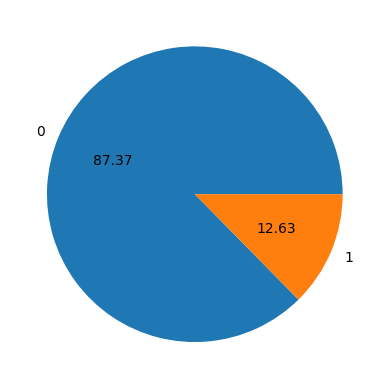

In [101]:
import matplotlib.pyplot as plt


value_counts = dp['target'].value_counts()
labels = value_counts.index.tolist()

plt.pie(value_counts, labels=labels, autopct="%0.2f")
plt.show()

In [102]:
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [103]:
dp['num_characters']=dp['text'].apply(len)

<ipython-input-103-fabd328259a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['num_characters']=dp['text'].apply(len)


In [104]:
dp.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [105]:
dp['num_words'] = dp['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-105-c40a0e7efd88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['num_words'] = dp['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [106]:
dp.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [107]:
dp['num_sentences'] = dp['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-107-1296e9d63b67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['num_sentences'] = dp['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [108]:
dp.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [109]:
dp[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [110]:
dp[dp['target'] == 0] [['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [111]:
dp[dp['target'] == 1] [['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

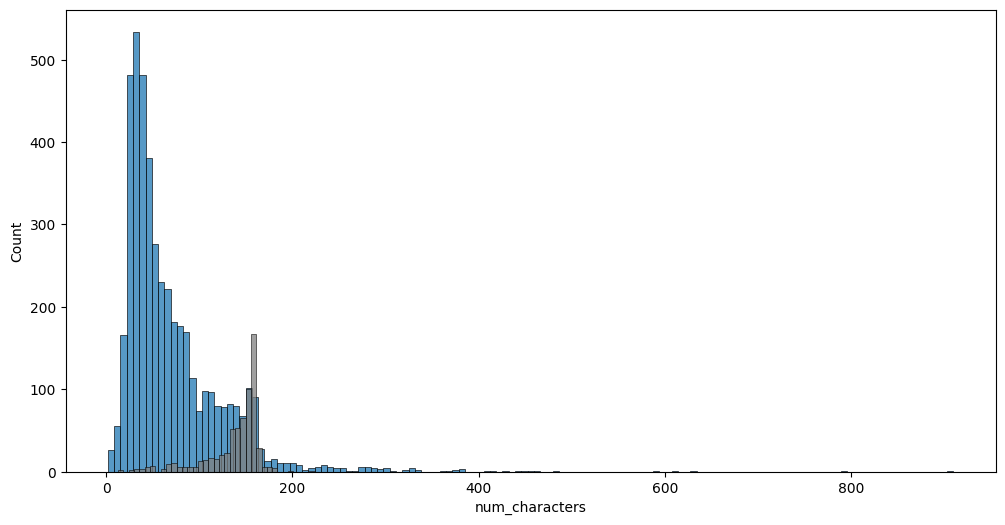

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(dp[dp['target'] == 0]['num_characters'])
sns.histplot(dp[dp['target'] == 1]['num_characters'],color='grey')

<Axes: xlabel='num_words', ylabel='Count'>

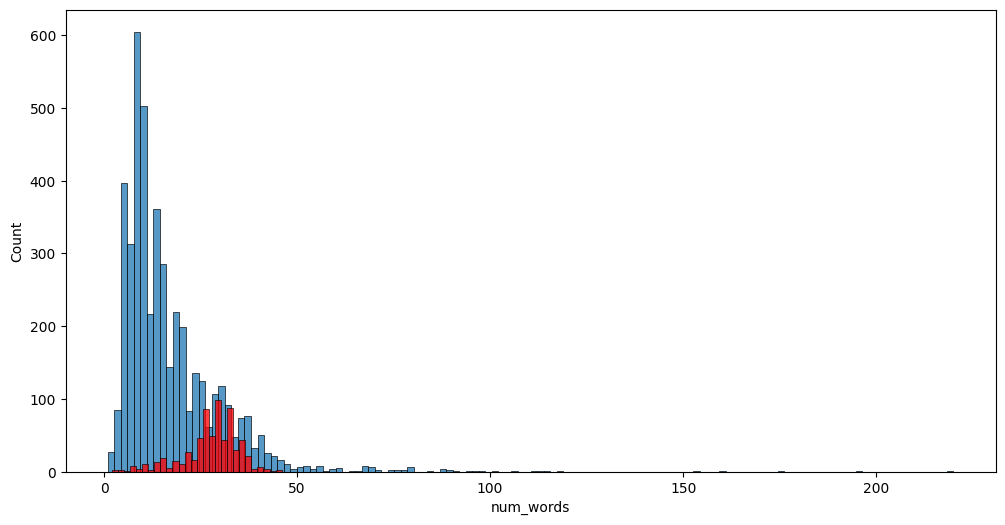

In [125]:
plt.figure(figsize=(12,6))
sns.histplot(dp[dp['target'] == 0]['num_words'])
sns.histplot(dp[dp['target'] == 1]['num_words'],color='red')

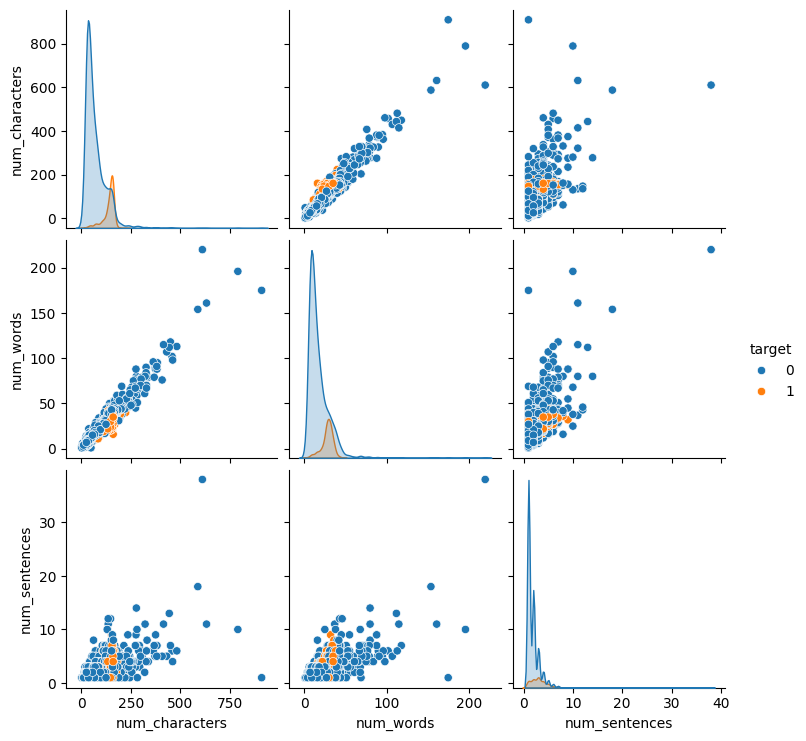

In [126]:
sns.pairplot(dp,hue='target')

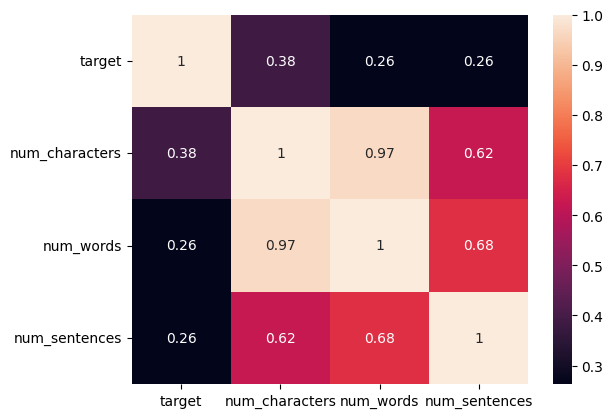

In [129]:
dp_numeric = dp.select_dtypes(include=['number'])

sns.heatmap(dp_numeric.corr(), annot=True)
plt.show()

In [201]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.porter import PorterStemmer
import string

In [202]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    ps = PorterStemmer()

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [204]:
dp['text'][432]

'Congrats! Nokia 3650 video camera phone is your Call 09066382422 Calls cost 150ppm Ave call 3mins vary from mobiles 16+ Close 300603 post BCM4284 Ldn WC1N3XX'

In [205]:
transform_text("Congrats! Nokia 3650 video camera phone is your Call 09066382422 Calls cost 150ppm Ave call 3mins vary from mobiles 16+ Close 300603 post BCM4284 Ldn WC1N3XX")

'congrat nokia 3650 video camera phone call 09066382422 call cost 150ppm ave call 3min vari mobil close 300603 post bcm4284 ldn wc1n3xx'

In [206]:
dp['transformed_text'] = dp['text'].apply(transform_text)

<ipython-input-206-9a8c7872491b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['transformed_text'] = dp['text'].apply(transform_text)


In [207]:
dp.head()

,target,text,num_characters,num_words,num_sentences,transformed_text,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,None
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,None
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,None
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,None
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,None


In [219]:
from wordcloud import WordCloud
wc = WordCloud(width=800, height=400, min_font_size=10, background_color='grey')

In [221]:
spam_wc = wc.generate(dp[dp['target']==1]['transformed_text'].str.cat(sep=" "))

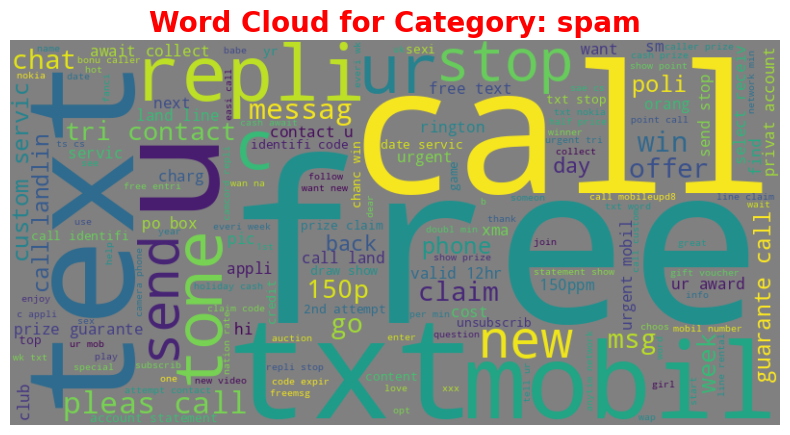

In [222]:
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear', cmap='viridis')
plt.title(f'Word Cloud for Category: spam', fontsize=20, fontweight='bold', color='red')
plt.axis('off')
plt.show()

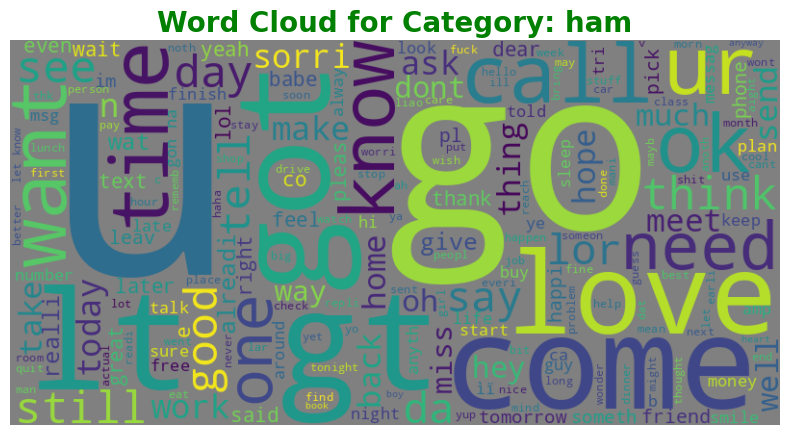

In [223]:
spam_wc = wc.generate(dp[dp['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear', cmap='viridis')
plt.title(f'Word Cloud for Category: ham', fontsize=20, fontweight='bold', color='green')
plt.axis('off')
plt.show()

In [224]:
dp.head()

,target,text,num_characters,num_words,num_sentences,transformed_text,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,None
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,None
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,None
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,None
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,None


In [225]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [227]:
X = tfidf.fit_transform(dp['transformed_text']).toarray()

In [228]:
X.shape


(5169, 3000)

In [230]:
y=dp['target'].values

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=2)

In [233]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [234]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [235]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))

0.8694390715667312


In [236]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.9709864603481625


In [237]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))


0.9835589941972921


In [240]:
from sklearn.ensemble import ExtraTreesClassifier # Import ExtraTreesClassifier
from sklearn.svm import SVC # Import the SVC class
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [241]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [242]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [243]:
y_pred = voting.predict(X_test)

In [244]:
accuracy = accuracy_score(y_test, y_pred)

In [245]:
accuracy

0.9816247582205029